#### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Final Exam
### Due: Monday, May 2nd at 4.00pm CST


---

## Problem 1

A model with 10 parameters describes the statistics of the temperature fluctuations
of the Cosmic Microwave Background. We fit this model to 45 published data points of the
variance of the fluctuations as a function of angular scale and find χ2 = 52.7. We then set 5
of the model parameters to zero and fit the model again, this time getting χ2 = 54. Were we
justified in using all 10 parameters in the model?


### Solution

Greater difference between expected and actual data produces greater $\chi^{2}$ value. Here we can see that when we are using 10 parameters, we are getting less $\chi^{2}$ value. So, using 10 parameters would give us a better expected data. 

## Problem 2

Explain what Malmquist bias is. Use the Malmquist bias to explain how it can fool the unwary astronomer into thinking that stellar or galaxy luminosities measured at different wavelengths can appear correlated, even if there is no true correlation.

### Solution

Malmquist bias is a selection bias applicable to astronomical surveys stemming from missing the dimmest objects. The further away, the larger percentage of objects at that distance will be too dim to be detected, and the collected observations will include both bright and dim objects at nearer distances but only the brighter ones at greater distances. In other words, the greater the distance, the stronger the preference (bias) toward brighter objects, meaning evaluation of the randomness of sample-sets must take this into consideration. Generally the brightness is associated with the type or size of the object, and population statistics at different distances need to take the bias into account.

## Problem 3

1) Read in final_data_3.npy. This is a (10 x 2) numpy array, with voltage measurements in the first column and heteroscedastic voltage uncertainties in the second column. Compute the sample mean and the standard error on the sample mean for this data.

2) Fit the appropriate ln-likelihood function and find the best-fit mean voltage.

3) Compute and plot the Bayesian posterior probability density (not the log posterior) for the mean voltage assuming a uniform prior for the mean in the range 3 to 7. Make sure this posterior pdf is normalized.

4) By either drawing samples from this posterior, or using your gridded posterior pdf to make a cdf, find the equal-tailed 68.3% credible region for the mean, and compare the upper and lower boundaries to the sample mean plus/minus the standard error, respectively. Also find the MAP value of the mean.

### Solution

In [11]:
# Execute this cell
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats
from scipy import mean
from scipy.stats import sem

data = np.load('final_data_3.npy')


mean_1 = round(np.mean(data[0]),2)
mean_2 = round(np.mean(data[1]),2)
sigma_1 = round(sem(data[0]),2)
sigma_2 = round(sem(data[1]),2)




print("The mean of the voltage measurements is", mean_1)
print("The sem of the voltage measurements is", sigma_1)
print("The mean of the heteroscedastic voltage uncertainties is", mean_2)
print("The sem of the heteroscedastic voltage uncertainties is", sigma_2)




The mean of the voltage measurements is 3.3
The sem of the voltage measurements is 1.06
The mean of the heteroscedastic voltage uncertainties is 2.97
The sem of the heteroscedastic voltage uncertainties is 1.03


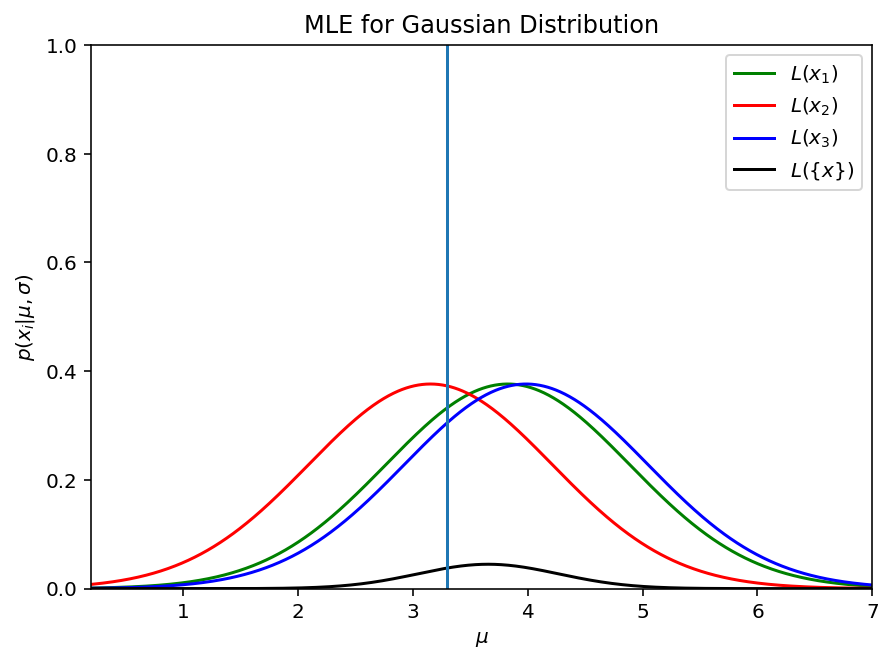

In [16]:
N = 3

np.random.seed(42)
sample = norm(mean,sigma).rvs(size = N)
print(sample)

# calculate the likelihoods and plot them
xgrid = np.linspace(0,7,1000)
#here use the locations from above
L1 = norm.pdf(xgrid,loc=3.826517,scale=1.059999999) #This is a Gaussian PDF sampled uniformly, centered at a specific location.
L2 = norm.pdf(xgrid,loc=3.15343984,scale=1.0599999999999998)
L3 = norm.pdf(xgrid,loc=3.98654985,scale=1.0599999999999998)
L = L1*L2*L3 #Total L is ???

fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(xgrid, L1, ls='-', c='green', label=r'$L(x_1)$')
plt.plot(xgrid, L2, ls='-', c='red', label=r'$L(x_2)$')
plt.plot(xgrid, L3, ls='-', c='blue', label=r'$L(x_3)$')
plt.plot(xgrid, L, ls='-', c='black', label=r'$L(\{x\})$')
plt.axvline(x=mean)
plt.xlim(0.2, 7)
plt.ylim(0, 1)
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('MLE for Gaussian Distribution')
plt.legend()

Text(0, 0.5, 'Probability')

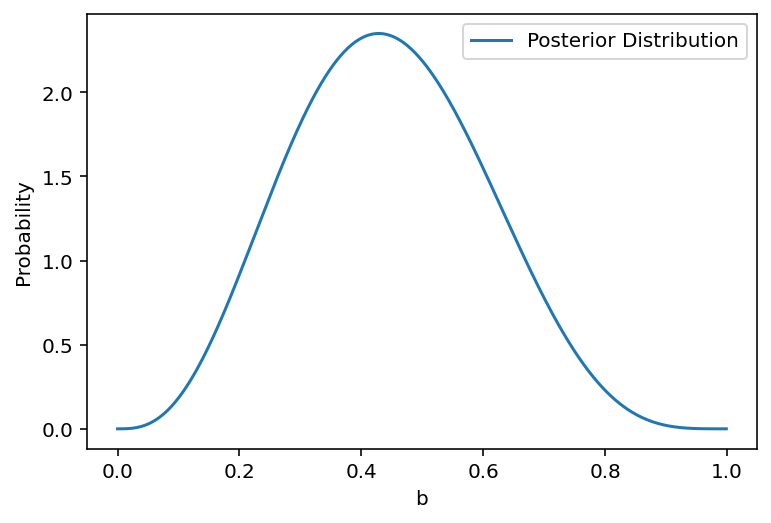

In [18]:
# Importing all the necessary libraries
import random
import numpy as np
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm



# Defining two variables k and N
k = 3
N = 7


# Defining the necessary functions
def posterior(b, k, N):
    return (b**k)*((1-b)**(N-k))

def post_dist(k, N):
    list_1 = []
    list_2 = np.arange(0,1,0.001)
    
    for b in list_2:
        list_1.append(posterior(b, k, N))
        
    list_1 = list_1/(sum(list_1)*0.001)
    
    return list_1, list_2

y,x = post_dist(k, N)


#pdf  = stats.norm(mean, sigma).pdf(x)



plt.plot(x,y)
plt.legend(['Posterior Distribution'])
plt.xlabel('b')
plt.ylabel('Probability')

## Problem 4

This problem has to do with dimensional reduction. We're going to load in a sample of SDSS Imaging data.

1. Execute the cell below to read in the data, print out the feature names, and create a data matrix out of a subset of features.


In [58]:
from astroML.datasets import fetch_imaging_sample
data = fetch_imaging_sample()  
data.shape  # number of objects in dataset

print(data.dtype.names)

keylist = ['ra', 'dec', 'rExtSFD', 'uRaw', 
           'gRaw', 'rRaw', 'iRaw', 'zRaw', 
           'uErr', 'gErr', 'rErr', 'iErr', 
           'zErr', 'uRawPSF', 'gRawPSF', 
           'rRawPSF', 'iRawPSF', 'zRawPSF', 
           'upsfErr', 'gpsfErr', 'rpsfErr', 
           'ipsfErr', 'zpsfErr']

X = np.column_stack([data[key] for key in keylist]) 

('ra', 'dec', 'run', 'rExtSFD', 'uRaw', 'gRaw', 'rRaw', 'iRaw', 'zRaw', 'uErr', 'gErr', 'rErr', 'iErr', 'zErr', 'uRawPSF', 'gRawPSF', 'rRawPSF', 'iRawPSF', 'zRawPSF', 'upsfErr', 'gpsfErr', 'rpsfErr', 'ipsfErr', 'zpsfErr', 'type', 'ISOLATED')


2. Use PCA (with randomized svd_solver for speed if necessary) to reduce the data matrix down to features. What is the explained variance of the data encapsulated in these eigen-features?

3. 
    Access the `type` key of the `data` structure and make an array of labels out of these. Do some research in astroML documentation to find out what these integer types correspond to, and state that here.

4. Choose 5000 random integers between 0 and the number of samples in the data matrix. Record these integers because you'll use them later. Make a scatter plot of the PCA-reduced data for these 5000 random samples, colored by their corresponding type. (You may want to set the transparency to be lower than 1 to see the mixing of samples.)


5.  Now try some non-linear dimensional reduction. These algorithms are slower than PCA, so you will operate only on the 5000 random samples identified in the previous part.

* Try LocallyLinearEmbedding, Isomap, and TSNE algorithms, setting the number of components to be 2 in all cases.
* As in the PCA case, make scatter plots of the dimensionally-reduced data, color coded by their type. For LLE and Isomap, experiment with the number of nearest neighbors between 5 and 100 to see what visually gives the best separation in type populations. For TSNE, do the same for the perplexity attribute.
* Which algorithm gives the cleanest way to visually see the two populations of sources? (This will be subjective according to the samples you trained on, and even the randomness of the algorithms.)




### Solution

In [121]:
# Project onto 2 axes with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=1) # 2 components
pca.fit(X) # Do the fitting


X_reduced = pca.transform(X)



var = round(sum(pca.explained_variance_ratio_[0:1])*100, 2)

print("The explained variance of the data encapsulated in these eigen-features", var)

The explained variance of the data encapsulated in these eigen-features 53.32


In [122]:
count = 0

for i in data[0]:
    count += 1
    

datatype = []
    
for i in range(count):
    datatype.append(data.dtype[i])
    
print(datatype)



[dtype('float64'), dtype('float64'), dtype('int16'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('int16'), dtype('int32')]


In [123]:
print(X_reduced)

[[-1.92829546]
 [ 2.70518645]
 [-1.35651756]
 ...
 [-3.96520909]
 [ 5.74002897]
 [-1.80072134]]


[[ 83 211]
 [124 226]
 [168 194]
 ...
 [ 35 141]
 [ 99 200]
 [197 214]]


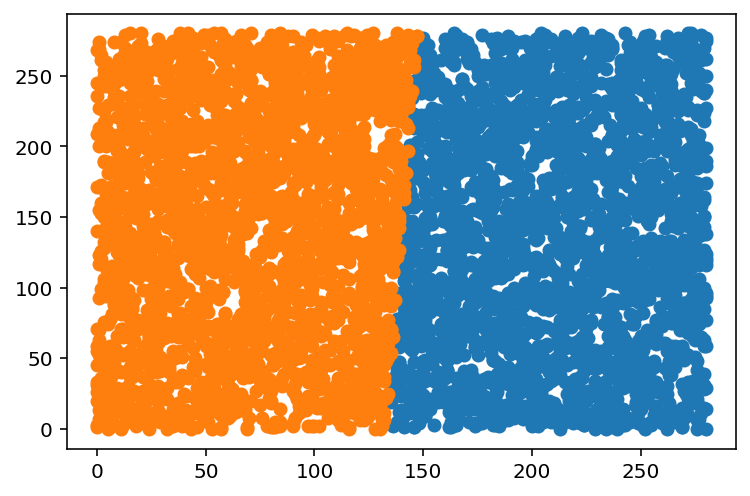

In [136]:
import random
from sklearn.cluster import KMeans
from sklearn import preprocessing


max_val = int(np.amax(X))

a = np.random.randint(0, max_val, size = (5000, 2))

print(a)

clf = KMeans(n_clusters=2) #Try 2 clusters to start with
clf.fit(a)
centers = clf.cluster_centers_ #alocation of the clusters
labels = clf.predict(a) #labels for each of the points

# plot the data color-coded by cluster id
colors = ['C0', 'C1', 'C2']
for ii in range(3):
    plt.scatter(a[labels==ii,0], a[labels==ii,1], 
                color=colors[ii])

    
    

In [93]:
X = np.concatenate([np.random.normal(size=(500,2)),
                   np.random.normal(loc=3.0, size=(500,2))])

centers = clf.cluster_centers_ #alocation of the clusters
labels = clf.predict(X) #labels for each of the points

# plot the data color-coded by cluster id
colors = ['C0', 'C1', 'C2']
for ii in range(3):
    plt.scatter(X[labels==ii,0], X[labels==ii,1], 
                color=colors[ii])

TypeError: only integer scalar arrays can be converted to a scalar index

In [55]:

count = 0

for i in X[0]:
    count += 1
    
print(count)

print(X_reduced[:,0])

print(X_reduced)

26
[-1.92829546  2.70518645 -1.35651756 ... -3.96520909  5.74002897
 -1.80072134]
[[-1.92829546  4.68445937]
 [ 2.70518645  4.82312286]
 [-1.35651756  4.68673853]
 ...
 [-3.96520909  1.25760925]
 [ 5.74002897  1.11201028]
 [-1.80072134  1.15138748]]
